In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

weather_df = pd.read_csv('data/philadelphia_weather_2005_to_2025.csv')
weather_df = weather_df.assign(date=pd.to_datetime(weather_df['date']))

## Analysis

Christmas weather in Philadelphia is notoriously unpredictable. To understand how unusual this variability really is, this blog will examine daily weather records from 2005 - 2025, focusing on Christmas Day and placing it in the context of broader temperature, snowfall, and extreme weather trends.

We will ultimately determine if it is worth staying in Philadelphia for the holiday season.

#### How variable is the temperature on Christmas day in Philadelphia?

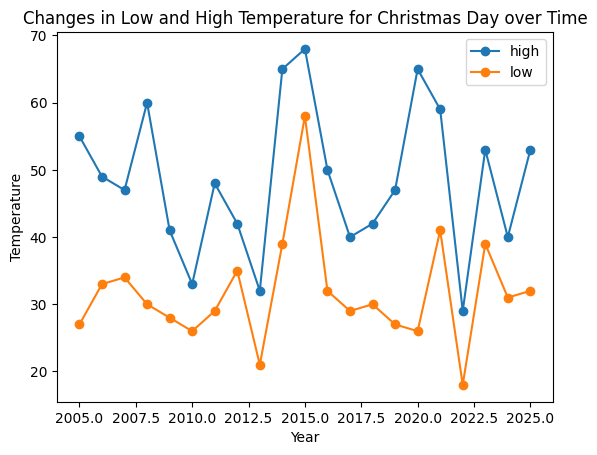

In [2]:
christmas_df = weather_df.query("day=='December 25'").set_index('year')[['high','low']]
christmas_df.plot(kind = 'line', style = '-o')
plt.title("Changes in Low and High Temperature for Christmas Day over Time")
plt.ylabel("Temperature")
plt.xlabel("Year")

plt.show()

Christmas Day temperatures fluctuate substantially from year to year, with no clear long term trend over the period.

In [3]:
print(f"Hottest Christmas: {christmas_df['high'].idxmax()}, {christmas_df['high'].max()} degrees F.")
print(f"Coldest Christmas: {christmas_df['low'].idxmin()}, {christmas_df['low'].min()} degrees F.")
print(f"Greatest temperature change: {(christmas_df['high'] - christmas_df['low']).idxmax()}, with a temperature difference between high and low of {(christmas_df['high'] - christmas_df['low']).max()} degrees Farenheit.")

Hottest Christmas: 2015, 68 degrees F.
Coldest Christmas: 2022, 18 degrees F.
Greatest temperature change: 2020, with a temperature difference between high and low of 39 degrees Farenheit.


The hottest Christmas in the dataset was in 2015, with a high temperature of 68 degrees Farenheit.
An additional interesting fact is that 2015 was the hottest Christmas in any year from 1874 to 2025, tied only with Christmas in 1964. (According to https://www.stormfax.com/phlChristmasWx.htm)

The coldest Christmas in the dataset was in 2022, with a low temperature of 18 degrees Farenheit.
However, this is still 17 degrees Farenheit warmer than the coldest Christmas day, which was in 1980 and 1983, which had a minimum temperature of just 1 degree Farenheit. (https://www.stormfax.com/phlChristmasWx.htm)

The Christmas with the greatest temperature change was in 2020, with a temperature difference between high and low of 39 degrees Farenheit.

#### Changes in Annual Snowfall

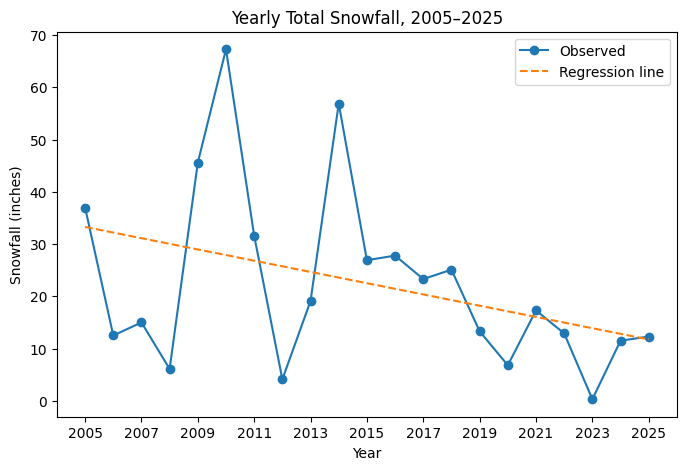

year
2010    67.3
2014    56.9
2009    45.6
2005    37.0
2011    31.6
Name: snow, dtype: float64

In [4]:
annual_snow = weather_df.groupby('year')['snow'].sum()

x = annual_snow.index.values
y = annual_snow.values

slope, intercept = np.polyfit(x, y, 1)
y_hat = intercept + slope * x

plt.figure(figsize=(8,5))

plt.plot(x, y, '-o', label='Observed')
plt.plot(x, y_hat, '--', label='Regression line')

plt.title("Yearly Total Snowfall, 2005–2025")
plt.xlabel("Year")
plt.ylabel("Snowfall (inches)")

plt.xticks(annual_snow.index[::2])
plt.legend()
plt.show()

annual_snow.sort_values(ascending = True).head(5)
annual_snow.sort_values(ascending = False).head(5)

The fitted regression line suggests a decline in total snowfall over time, although snowfall remains highly variable from year to year.

2010 saw the greatest amount of snow in the data set receiving 67.3 inches, which is 11.6 inches more than 2014, the year with the second highest snowfall. An interesting fact is that during this year's snowstorm on January 26, certain parts of Philadelphia received 9.3 inches of snow, which is already more snow than the total yearly snowfall observed in 2023, 2012, 2008 and 2020.

#### Long Term Temperature Trends

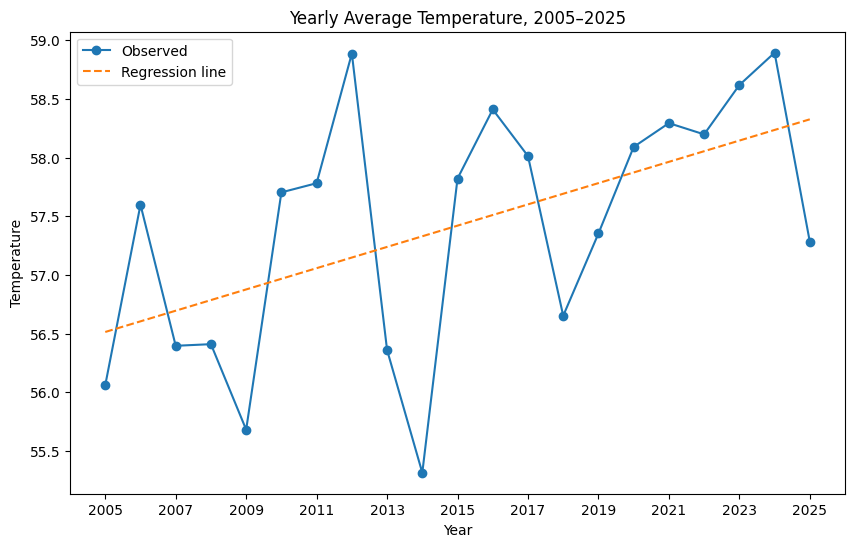

Equation: y = 0.0907 * x + -125.2568


In [5]:
weather_df['avg'] = (weather_df['high'] + weather_df['low']) / 2

yearly_avg = weather_df.groupby('year')['avg'].mean()

# Obtaining the index and values for the plot.
x = yearly_avg.index.values
y = yearly_avg.values

# Creating a regression line.
slope, intercept = np.polyfit(x, y, 1)
y_hat = intercept + slope * x

# Increasing size of plot.
plt.figure(figsize=(10,6))

# Plotting observed data and the regression line on the same plot.
plt.plot(x, y, '-o', label='Observed')
plt.plot(x, y_hat, '--', label='Regression line')

plt.title("Yearly Average Temperature, 2005–2025")
plt.xlabel("Year")
plt.ylabel("Temperature")

# Adjusting the indexing so only every two years labelled.
plt.xticks(annual_snow.index[::2])
plt.legend()
plt.show()

print(f"Equation: y = {slope:.4f} * x + {intercept:.4f}")

We can see that there were many fluctuations in the yearly average temperature, with peaks in 2006, 2012, 2016, 2021, 2024.

The plotted regression line on the graph shows that the yearly average temperature increases as the years went by. More specifically, every year, the yearly average temperature goes up by 0.0907 degrees Farenheit on average. The fitted trend suggests an increase in average temperature over this period, though year-to-year variability is still large.

#### Changes in Average Temperature in December over the Years

Equation: y = 0.0760 * x + -113.4909


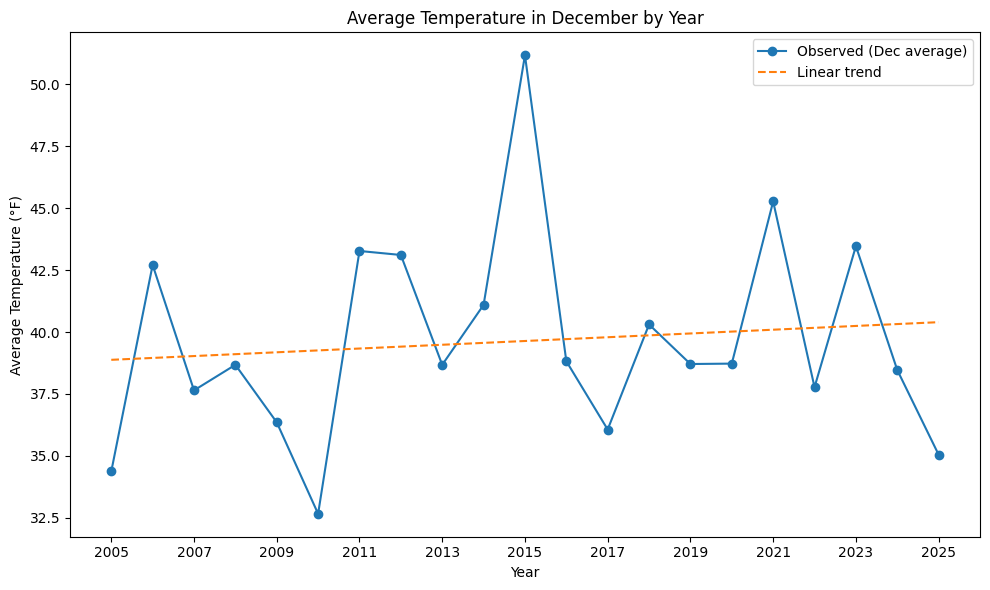

In [9]:
december_df = weather_df[weather_df['date'].dt.month == 12]

dec_avg_by_year = december_df.groupby(december_df['date'].dt.year)['avg'].mean()

# Regression line
x = dec_avg_by_year.index.values.astype(float)
y = dec_avg_by_year.values.astype(float)

slope, intercept = np.polyfit(x, y, 1)
y_hat = intercept + slope * x

print(f"Equation: y = {slope:.4f} * x + {intercept:.4f}")

# Plot
plt.figure(figsize=(10,6))
plt.plot(x, y, '-o', label='Observed (Dec average)')
plt.plot(x, y_hat, '--', label='Linear trend')

plt.title("Average Temperature in December by Year")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°F)")
plt.xticks(x[::2])
plt.legend()
plt.tight_layout()
plt.show()

The regression line suggests that the average December temperature has been rising slowly throughout time, increasing an average of 0.076 degrees Farenheit every year. We can also see that there was an unusually warm December in 2015, with an average temperature above 50 degrees Farenheit.

#### Temperature Extremes over Time

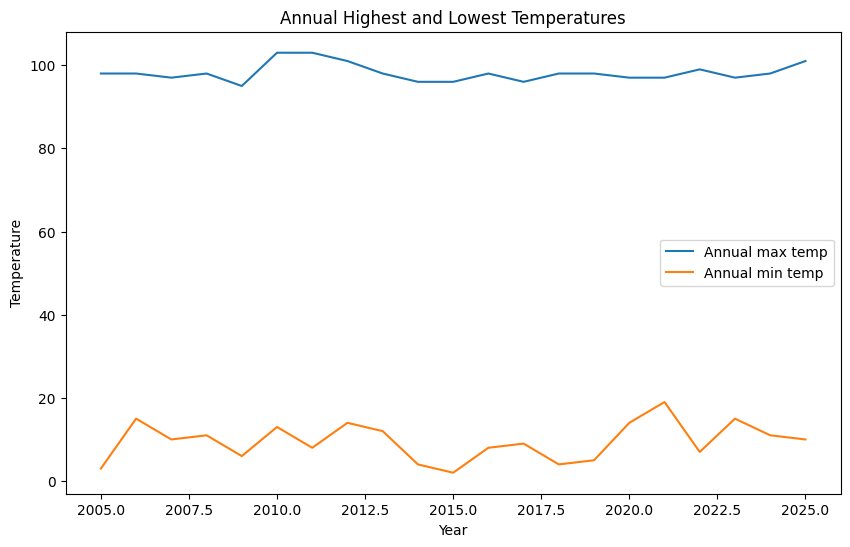

Mean annual max temp: 98.19
Mean annual min temp: 9.52
Std dev of annual max temp: 2.16
Std dev of annual min temp: 4.57
Year with highest annual max temp: 2010, temp: 103
Year with lowest annual min temp: 2015, temp: 2


In [6]:
highest_temps = weather_df.groupby('year')['high'].max()
lowest_temps = weather_df.groupby('year')['low'].min()

x = highest_temps.index.values

plt.figure(figsize=(10,6))

plt.plot(x, highest_temps, label='Annual max temp')
plt.plot(x, lowest_temps, label='Annual min temp')

plt.xlabel("Year")
plt.ylabel("Temperature")
plt.title("Annual Highest and Lowest Temperatures")
plt.legend()
plt.show()

mean_max_temp = highest_temps.mean()
mean_min_temp = lowest_temps.mean()

print(f"Mean annual max temp: {mean_max_temp:.2f}")
print(f"Mean annual min temp: {mean_min_temp:.2f}")

std_max_temp = highest_temps.std()
std_min_temp = lowest_temps.std()

print(f"Std dev of annual max temp: {std_max_temp:.2f}")
print(f"Std dev of annual min temp: {std_min_temp:.2f}")

year_highest_max = highest_temps.idxmax()
year_lowest_min = lowest_temps.idxmin()

print(f"Year with highest annual max temp: {year_highest_max}, temp: {highest_temps.max()}")
print(f"Year with lowest annual min temp: {year_lowest_min}, temp: {lowest_temps.min()}")

The annual maximum temperatures were fairly consistent throughout the 20 years, with a standard deviation of 2.16 degrees and an average maximum temperature of 98.19 degrees. The year with the hottest day was in 2010, with a temperature of 103 degrees, which interestingly enough was the year with the highest recorded annual snowfall in the dataset.

Annual minimum temperatures have greater temperature fluctuation, with standard deviation of 4.57 degrees. The average annual minimum temperatures was 9.52 degrees. The year with the coldest day was in 2015 at 2 degrees, but this is interesting as it had an unusually warm December as outlined previously.

## Conclusion

Weather patterns in Philadelphia over the past two decades point to a combination of gradual warming, declining snowfall, and substantial variability in winter conditions. Christmas Day, in particular, shows no consistent pattern. However, analysis of the weather more broadly in the past 20 years indicates a gradual increase in average temperatures alongside fewer sustained periods of heavy snowfall. 

From the decreases in snowfall and increases in average temperature, we would recommend that if you want snow-filled winter, it may be preferable to spend the holiday season elsewhere. However, if you are staying in Philadelphia, one can enjoy warmer average temperatures through the holiday season compared to 20 years ago.